source https://python-graph-gallery.com/circular-barplot-with-groups/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)

In [41]:
df_math = pd.DataFrame({
    "name":["Math analysis","Linear algebra","Statistics","Probability calc","Algorithms"],
    "value":[90,80,60,70,25]
})
df_math["group"] = "Math"

df_libs1 =  pd.DataFrame({
    "name":["Pandas","Numpy","Matblotlib","Seaborn","Scikit","PyTorch","Keras", "Statsmodels" ],
    "value":[95,       85,      30,          35,      50,       80,      20,       10  ]
})
df_libs2 =  pd.DataFrame({
    "name":["Catboost","LightGBM","NTLK","RegEx","JSON" ],
    "value":[80,             85,    10,     30,    15 ]
})
df_libs = pd.concat([df_libs1,df_libs2],ignore_index = True)
df_libs["group"] = "Libs"

df_stack = pd.DataFrame({
    "name":["Git","Kubuntu","Shell(CLI)","Jupyter Notebook","VScode","SQL","Docker","C/C++"],
    "value":[80,60,35,95,70,60,20,15]
})
df_stack["group"] = "Stack"

df = pd.concat([df_math,df_libs,df_stack],ignore_index = True)
df = df.sort_values(by="group",ignore_index=True)
df

,name,value,group
0,Statsmodels,10,Libs
1,JSON,15,Libs
2,RegEx,30,Libs
3,NTLK,10,Libs
4,LightGBM,85,Libs
5,Pandas,95,Libs
6,Numpy,85,Libs
7,Matblotlib,30,Libs
8,Seaborn,35,Libs
9,Scikit,50,Libs


In [42]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [43]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

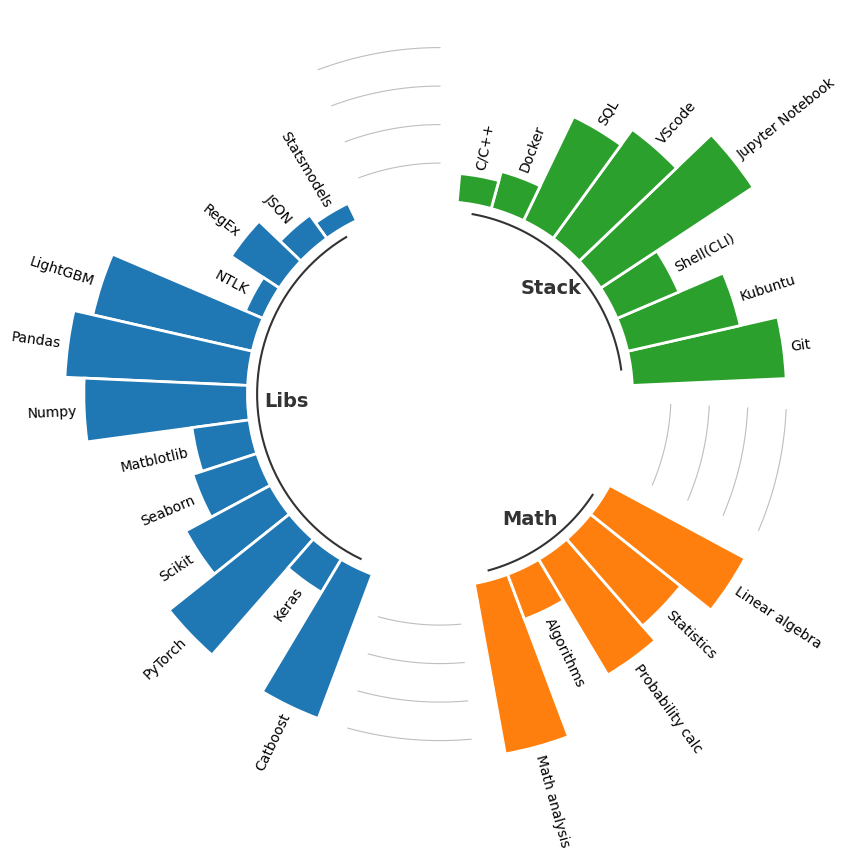

In [44]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

GROUPS_SIZE2 = [len(i[1]) for i in df.groupby("group")]

COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(sorted([ "Stack","Libs","Math",]), GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD